<a href="https://colab.research.google.com/github/kushs5497/Logistic-Regression-Decision-Tree-Model-for-predicting-Loan-Default/blob/main/Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Implementation

This is the begining of my Linear Regression Model. Below I am starting by adding the Google Colab upload lines, then importing the main libaries I'll need, as I go along I will import additional libraries just to coveniently show which libraries I am using for particular tasks. Below my import statements I am simply loading the given excel files and examining a quick simple stat overview to ensure their isn't any missing data and to understand the range/mean of the data to figure out what I will need to to normalize or transform.

In [ ]:
# Used to upload the Training Data
from google.colab import files
upload = files.upload()

Saving Testing_R-290496_Candidate Attach # 2_PresSE_SRF #747.xlsm to Testing_R-290496_Candidate Attach # 2_PresSE_SRF #747.xlsm
Saving Training_R-290496_Candidate Attach #1_PresSE_SRF #747 copy.xlsm to Training_R-290496_Candidate Attach #1_PresSE_SRF #747 copy.xlsm
Saving Training_R-290496_Candidate Attach #1_PresSE_SRF #747.xlsm to Training_R-290496_Candidate Attach #1_PresSE_SRF #747.xlsm


In [ ]:
# Importing the libraries for Logistic Regression Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp


In [ ]:
training_data = pd.read_excel("Training_R-290496_Candidate Attach #1_PresSE_SRF #747.xlsm")
testing_data = pd.read_excel("Testing_R-290496_Candidate Attach # 2_PresSE_SRF #747.xlsm")
training_data.describe()

,Mortgage,Card Utilization,Card Balance,Card Balance_3m,Card Balance_6m,Card Balance_12m,Amount Past Due,Delinquency Status,Credit Inquiry,Open Trade,...,Open Trade_6m,Credit Inquiry_12m,Open Trade_12m,Delinquency Status_3m,Delinquency Status_6m,Delinquency Status_12m,DDA Balance_9m,Gender,Race,Status
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.00000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.00000,2.000000e+04,20000.000000,20000.000000,20000.000000
mean,2.223273e+05,0.471893,1237.715125,1222.096796,1226.631756,1232.061434,1.002658e+05,1.124200,0.38580,0.196050,...,0.827450,3.000100,1.498850,1.56525,1.82425,2.03805,1.507727e+05,0.534400,0.454400,0.536850
std,9.284740e+04,0.287075,1295.855586,1122.983534,1061.810440,1043.348088,9.999747e+06,1.654089,0.68028,0.468001,...,1.182136,3.236931,1.830455,1.74373,1.73491,1.70571,1.224683e+07,0.498828,0.497929,0.498653
min,1.082121e+05,0.001897,2.020000,15.780000,35.100000,56.430000,0.000000e+00,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.562686e+05,0.227010,382.332500,473.657500,505.962500,513.960000,0.000000e+00,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,1.00000,0.000000e+00,0.000000,0.000000,0.000000
50%,1.941046e+05,0.413521,818.480000,875.635000,901.380000,912.905000,0.000000e+00,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,1.00000,1.00000,2.00000,0.000000e+00,1.000000,0.000000,1.000000
75%,2.614491e+05,0.728967,1621.152500,1592.827500,1613.985000,1620.655000,2.471475e+02,2.000000,1.00000,0.000000,...,2.000000,6.000000,3.000000,3.00000,3.00000,4.00000,0.000000e+00,1.000000,1.000000,1.000000
max,1.207620e+06,0.999970,15912.930000,13751.940000,12205.460000,12704.330000,1.000000e+09,5.000000,9.00000,5.000000,...,8.000000,12.000000,10.000000,5.00000,5.00000,5.00000,1.000000e+09,1.000000,1.000000,1.000000


Here I am begining my data visualization. I just simply started out by having a drop down menu to quickly compare single features to Status. Additionally, I execute a quick overview using pandas.

In [ ]:
# Setting data visualization size
plt.rcParams["figure.figsize"] = (5, 3)

# Importing libs to quickly view different categories against 'Status'
import ipywidgets as widgets
from IPython.display import display

# Create a dropdown widget
column_names = list(training_data.columns)
dropdown = widgets.Dropdown(
    options=column_names,
    value='Mortgage',
    description='Select Column:'
)

# Function to update the scatter plot based on the selected column
def update_scatter_plot(selected_column):
    plt.scatter(training_data[selected_column], training_data['Status'])
    plt.xlabel(selected_column)
    plt.ylabel('Status')
    plt.title(f'Scatter Plot of {selected_column} vs. Status')
    plt.show()

# Connect the dropdown to the update function
widgets.interactive(update_scatter_plot, selected_column=dropdown)

interactive(children=(Dropdown(description='Select Column:', options=('Mortgage', 'Card Utilization', 'Card Ba…

With the above scatterplot I can examine relation between a given feature and 'Status' but it may be valuable to understand the correlation among any 2 features so I made a correlation matrix. This showed me that the expected features of 'Card Balance', 'Open Trade'/'Credit Inquiry', and 'Delinquency Status' over different time periods were correlated. This gave me the option to remove redundant features, however since these features are closely related, I believe it will only be treated as if these values are weighted more which will in turn be adjusted for by the weights.

<ipython-input-4-797a794403be>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = training_data.corr()


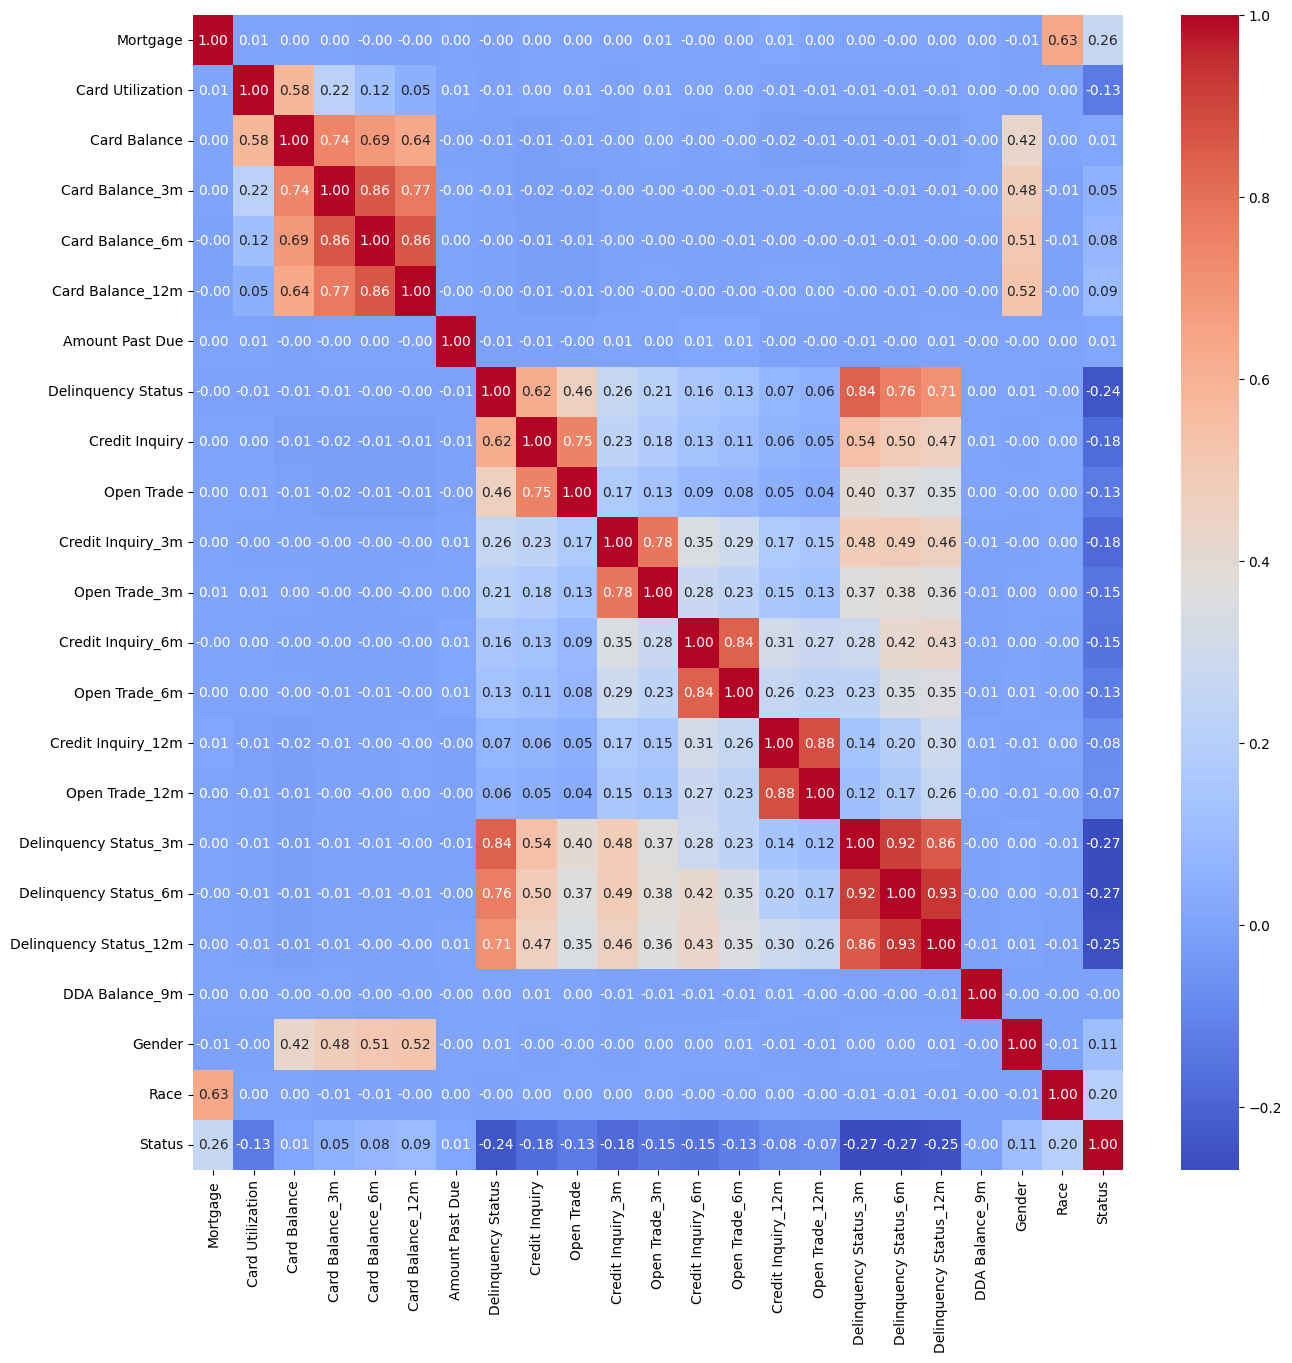

In [ ]:
import seaborn as sns

correlation_matrix = training_data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Now I will normalize all the non categorical features since the wide ranges of the numbers may cause convergence issues.

In [ ]:
from sklearn import preprocessing

# Arranging Data
X_train = training_data[['Mortgage', 'Card Utilization', 'Card Balance', 'Card Balance_3m', 'Card Balance_6m', 'Card Balance_12m', 'Amount Past Due', 'Delinquency Status', 'Credit Inquiry', 'Open Trade', 'Credit Inquiry_3m', 'Open Trade_3m', 'Credit Inquiry_6m', 'Open Trade_6m', 'Credit Inquiry_12m', 'Open Trade_12m', 'Delinquency Status_3m', 'Delinquency Status_6m', 'Delinquency Status_12m', 'DDA Balance_9m', 'Gender', 'Race']]
y_train = training_data['Status']
X_test = testing_data[['Mortgage', 'Card Utilization', 'Card Balance', 'Card Balance_3m', 'Card Balance_6m', 'Card Balance_12m', 'Amount Past Due', 'Delinquency Status', 'Credit Inquiry', 'Open Trade', 'Credit Inquiry_3m', 'Open Trade_3m', 'Credit Inquiry_6m', 'Open Trade_6m', 'Credit Inquiry_12m', 'Open Trade_12m', 'Delinquency Status_3m', 'Delinquency Status_6m', 'Delinquency Status_12m', 'DDA Balance_9m', 'Gender', 'Race']]
y_test = testing_data['Status']

# Extracting Weights
#sample_weights = training_data['Weight'].values.tolist()

# Selecting features to scale (excluding categorical features)
features_to_scale = ['Mortgage', 'Card Utilization', 'Card Balance', 'Card Balance_3m', 'Card Balance_6m', 'Card Balance_12m', 'Amount Past Due', 'Delinquency Status', 'Credit Inquiry', 'Open Trade', 'Credit Inquiry_3m', 'Open Trade_3m', 'Credit Inquiry_6m', 'Open Trade_6m', 'Credit Inquiry_12m', 'Open Trade_12m', 'Delinquency Status_3m', 'Delinquency Status_6m', 'Delinquency Status_12m', 'DDA Balance_9m']

# Initialize the scaler and fit it to features being scaled
scaler = preprocessing.StandardScaler().fit(X_train[features_to_scale])

# Transform the specified features
X_scaled_train = X_train.copy()
X_scaled_train[features_to_scale] = scaler.transform(X_train[features_to_scale])
X_scaled_test = X_test.copy()
X_scaled_test[features_to_scale] = scaler.transform(X_test[features_to_scale])


Finally I fit the model!

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Model Fitting
model = LogisticRegression()
model.fit(X_scaled_train, y_train)

# Model Evaluation
y_pred = model.predict(X_scaled_test)
accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)
coefficients = model.coef_
intercept = model.intercept_

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Accuracy: 0.6826
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      2305
           1       0.71      0.71      0.71      2695

    accuracy                           0.68      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.68      0.68      0.68      5000

Coefficients: [[ 0.67028631 -0.42335578  0.18520671 -0.09685742  0.02878902  0.08864938
   0.08388129 -0.24278601 -0.06609924 -0.00582592 -0.14819838 -0.02879356
  -0.1841786   0.02185864 -0.00495967 -0.05022115 -0.21725028 -0.0737213
   0.00322159 -0.01269631  0.3659807   0.18579911]]
Intercept: [-0.09013663]


# ML Model Implementation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Constraints
md = 10
mss = 1500
dt_classifier = DecisionTreeClassifier(max_depth=md, random_state=42)
dt_classifier = DecisionTreeClassifier(min_samples_split=mss, random_state=42)

le = LabelEncoder();
X_train_n = training_data.copy()
X_train_n['Race_n'] = le.fit_transform(X_train_n['Race_Category'])
X_train_n = X_train_n.drop('Race_Category',axis = 'columns')
#X_train_n = X_train_n.drop('Weight',axis = 'columns')
X_train_n = X_train_n.drop('Race',axis = 'columns')
X_train_n = X_train_n.drop('Status',axis = 'columns')
X_test_n = testing_data.copy()
X_test_n['Race_n'] = le.fit_transform(X_test_n['Race_Category'])
X_test_n = X_test_n.drop('Race_Category',axis = 'columns')
X_test_n = X_test_n.drop('Race',axis = 'columns')
X_test_n = X_test_n.drop('Status',axis = 'columns')

# Train the model
dt_classifier.fit(X_train_n, y_train)

y_pred = dt_classifier.predict(X_test_n)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

# Example using graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt_classifier, out_file=None,
                          feature_names=X_train_n.columns,
                          class_names=['0', '1'],
                          filled=True, rounded=True,
                          special_characters=True)
graph = graphviz.Source(dot_data)
renderFileName = str(accuracy)+"_decision_tree_depth_"+str(md)+"_min_sample_size_"+str(mss)
graph.render(renderFileName)




Accuracy: 0.654
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      2305
           1       0.68      0.69      0.68      2695

    accuracy                           0.65      5000
   macro avg       0.65      0.65      0.65      5000
weighted avg       0.65      0.65      0.65      5000



'0.654_decision_tree_depth_10_min_sample_size_1500.pdf'